## Name: Adeyemi Olutosin Funmilayo
## Student ID: 202502853

## Component 1 – Predicting Customer Behavior in Streaming Services
### Summary:
### In this component, I’ll explore both supervised and unsupervised learning techniques to analyze customer behavior and predict key outcomes like Monthly Spend and Churn. The dataset includes both numerical and categorical variables, and we will approach the tasks with scientific rigor and clear comparisons between different machine learning models.

### I will cover:

### Regression (Single & Multi-variable, with Linear & Non-linear models)

### Random Forests and Categorical Variable Inclusion

### Artificial Neural Networks (ANNs)

### Classification (Customer Churn)

### Clustering (k-Means and comparison with other algorithms)

# Component 1 (a) – Predicting Monthly Spend Using Single Numerical Features

### Objective:
### To evaluate and compare how well different **single numerical features** predict a customer's **Monthly Spend** using:

### Linear Regression  
### Polynomial Regression (degree 2)

### Metrics Used:
### Coefficients & Intercepts  
### Mean Absolute Error (MAE)  
### Mean Squared Error (MSE)  
### Root Mean Squared Error (RMSE)  
### R² Score

### Our goal is to:
### Identify the best single-feature predictor.
### Compare performance between linear vs. polynomial models.


In [47]:
# Imports
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("Streaming.csv")

# Drop rows with missing target or feature values
df_clean = df.dropna(subset=["Monthly_Spend", "Age", "Subscription_Length", 
                             "Support_Tickets_Raised", "Satisfaction_Score", "Discount_Offered"])

# Preview numeric features
numerical_features = ["Age", "Subscription_Length", "Support_Tickets_Raised", 
                      "Satisfaction_Score", "Discount_Offered"]


In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(X, y, model):
    y_pred = model.predict(X)
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)
    return y_pred, mae, mse, rmse, r2


In [49]:
def run_single_feature_analysis(feature):
    print(f"\n---  Feature: {feature} ---")
    X = df_clean[[feature]].values
    y = df_clean["Monthly_Spend"].values

    # Linear Regression
    lin_model = LinearRegression()
    lin_model.fit(X, y)
    y_pred_lin = lin_model.predict(X)
    lin_r2 = r2_score(y, y_pred_lin)
    lin_rmse = np.sqrt(mean_squared_error(y, y_pred_lin))
    lin_mse = mean_squared_error(y, y_pred_lin)
    lin_mae = mean_absolute_error(y, y_pred_lin)

    print(" Linear Regression")
    print(f"Coefficient: {lin_model.coef_[0]:.4f}")
    print(f"Intercept: {lin_model.intercept_:.4f}")
    print(f"MAE: {lin_mae:.4f}")
    print(f"MSE: {lin_mse:.4f}")
    print(f"RMSE: {lin_rmse:.4f}")
    print(f"R² Score: {lin_r2:.4f}")

    # Polynomial Regression (degree 2)
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)
    poly_model = LinearRegression()
    poly_model.fit(X_poly, y)
    y_pred_poly = poly_model.predict(X_poly)
    poly_r2 = r2_score(y, y_pred_poly)
    poly_rmse = np.sqrt(mean_squared_error(y, y_pred_poly))
    poly_mse = mean_squared_error(y, y_pred_poly)
    poly_mae = mean_absolute_error(y, y_pred_poly)

    print("\n Polynomial Regression (Degree 2)")
    print(f"Coefficients: {poly_model.coef_}")
    print(f"Intercept: {poly_model.intercept_:.4f}")
    print(f"MAE: {poly_mae:.4f}")
    print(f"MSE: {poly_mse:.4f}")
    print(f"RMSE: {poly_rmse:.4f}")
    print(f"R² Score: {poly_r2:.4f}")

    # Return all metrics for both models
    return lin_mae, lin_mse, lin_rmse, lin_r2, poly_mae, poly_mse, poly_rmse, poly_r2


In [50]:
lin_mae, lin_mse, lin_rmse, lin_r2, poly_mae, poly_mse, poly_rmse, poly_r2 = run_single_feature_analysis("Satisfaction_Score")



---  Feature: Satisfaction_Score ---
 Linear Regression
Coefficient: 2.5140
Intercept: 32.5947
MAE: 4.9763
MSE: 39.0560
RMSE: 6.2495
R² Score: 0.5719

 Polynomial Regression (Degree 2)
Coefficients: [0.         2.38598325 0.01161238]
Intercept: 32.8519
MAE: 4.9767
MSE: 39.0487
RMSE: 6.2489
R² Score: 0.5720


In [51]:
# Loop through all numerical features
for feature in numerical_features:
    run_single_feature_analysis(feature)



---  Feature: Age ---
 Linear Regression
Coefficient: 0.0061
Intercept: 46.2760
MAE: 7.6766
MSE: 91.2327
RMSE: 9.5516
R² Score: 0.0001

 Polynomial Regression (Degree 2)
Coefficients: [ 0.          0.0565225  -0.00057889]
Intercept: 45.3089
MAE: 7.6773
MSE: 91.2191
RMSE: 9.5509
R² Score: 0.0002

---  Feature: Subscription_Length ---
 Linear Regression
Coefficient: 0.3000
Intercept: 37.6628
MAE: 6.6569
MSE: 65.0959
RMSE: 8.0682
R² Score: 0.2866

 Polynomial Regression (Degree 2)
Coefficients: [0.00000000e+00 2.96846227e-01 5.27046083e-05]
Intercept: 37.6950
MAE: 6.6569
MSE: 65.0957
RMSE: 8.0682
R² Score: 0.2866

---  Feature: Support_Tickets_Raised ---
 Linear Regression
Coefficient: -1.0140
Intercept: 48.5993
MAE: 7.5936
MSE: 89.1647
RMSE: 9.4427
R² Score: 0.0228

 Polynomial Regression (Degree 2)
Coefficients: [ 0.         -1.45339878  0.08530787]
Intercept: 48.9674
MAE: 7.5920
MSE: 89.1026
RMSE: 9.4394
R² Score: 0.0234

---  Feature: Satisfaction_Score ---
 Linear Regression
Coeffic

## Observations:

### Satisfaction_Score was the strongest predictor with the highest R² score.
### Subscription_Length came second, followed by Discount_Offered.
### Polynomial regression did not offer significant improvement over linear models.
### The models for Age and Support_Tickets_Raised had low R², suggesting weak predictive power.

### We will now explore whether combining multiple features can improve performance in Component 1 (b).


# Component 1 (b) – Predicting Monthly Spend Using Multiple Numerical Features

### Objective:
### In this task, we build **multivariate regression models** to predict `Monthly Spend` using a combination of **multiple numerical features**.

### We aim to determine whether using multiple features improves performance over the single-variable models from Component 1 (a).

### Approach:
### Use Linear Regression** with all numerical input features.
### Use Polynomial Regression** (degree 2) on combined features.
### Evaluate performance using:
  #### Coefficients & Intercepts
  #### MAE, MSE, RMSE
  #### R² Score

### I will then compare this with results from Component 1 (a).


In [52]:
# Select features and target
X_multi = df_clean[numerical_features].values
y_multi = df_clean["Monthly_Spend"].values


In [53]:
# Linear Regression with multiple features
lin_multi_model = LinearRegression()
lin_multi_model.fit(X_multi, y_multi)

# Predictions & Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred_lin_multi = lin_multi_model.predict(X_multi)
lin_multi_mae = mean_absolute_error(y_multi, y_pred_lin_multi)
lin_multi_mse = mean_squared_error(y_multi, y_pred_lin_multi)
lin_multi_rmse = np.sqrt(lin_multi_mse)
lin_multi_r2 = r2_score(y_multi, y_pred_lin_multi)

# Output metrics
print(" Multivariate Linear Regression")
print(f"Coefficients: {lin_multi_model.coef_}")
print(f"Intercept: {lin_multi_model.intercept_:.4f}")
print(f"MAE: {lin_multi_mae:.4f}")
print(f"MSE: {lin_multi_mse:.4f}")
print(f"RMSE: {lin_multi_rmse:.4f}")
print(f"R² Score: {lin_multi_r2:.4f}")


 Multivariate Linear Regression
Coefficients: [-4.68520479e-05  2.99392132e-01 -1.19063014e+00  2.51061123e+00
  4.98012971e-01]
Intercept: 19.9781
MAE: 0.8797
MSE: 5.8641
RMSE: 2.4216
R² Score: 0.9357


In [54]:
# Polynomial Regression with multiple features (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly_multi = poly.fit_transform(X_multi)

poly_multi_model = LinearRegression()
poly_multi_model.fit(X_poly_multi, y_multi)

# Predictions & Evaluation
y_pred_poly_multi = poly_multi_model.predict(X_poly_multi)
poly_multi_mae = mean_absolute_error(y_multi, y_pred_poly_multi)
poly_multi_mse = mean_squared_error(y_multi, y_pred_poly_multi)
poly_multi_rmse = np.sqrt(poly_multi_mse)
poly_multi_r2 = r2_score(y_multi, y_pred_poly_multi)

# Output metrics
print("\n Multivariate Polynomial Regression (Degree 2)")
print(f"Intercept: {poly_multi_model.intercept_:.4f}")
print(f"MAE: {poly_multi_mae:.4f}")
print(f"MSE: {poly_multi_mse:.4f}")
print(f"RMSE: {poly_multi_rmse:.4f}")
print(f"R² Score: {poly_multi_r2:.4f}")



 Multivariate Polynomial Regression (Degree 2)
Intercept: 19.4670
MAE: 0.8845
MSE: 5.8473
RMSE: 2.4181
R² Score: 0.9359


## Observations:

### Compared to single-feature models in Component 1 (a), using multiple features significantly improves prediction accuracy.
### The multivariate linear model achieved a higher R² score than any single-feature model, indicating better generalization.
### Polynomial regression further improved the fit, though it increases complexity and computation.
### This suggests that Monthly Spend is influenced by an interaction of multiple numerical factors, rather than one dominant variable alone.

### I will next explore the impact of including categorical variables in **Component 1 (c)**.


# Component 1 (c) – Predicting Monthly Spend Using Both Numerical and Categorical Features

## Objective:
## To improve the accuracy of our regression model by including both:
### - Numerical features (e.g., Age, Subscription_Length)
### - Categorical features** (e.g., Gender, Region, Payment_Method)

## I will use a Random Forest Regressor, which:
### - Handles both types of features efficiently (after encoding)
### - Captures non-linear interactions
### - Is robust to overfitting with the right parameters

###  Approach:
#### 1. Combine and preprocess all features
#### 2. Encode categorical variables using **One-Hot Encoding**
#### 3. Train a **Random Forest Regressor**
#### 4. Evaluate performance using:
#####   - MAE, MSE, RMSE
#####   - R² Score


In [55]:
from sklearn.preprocessing import OneHotEncoder

# Define categorical and numerical features
categorical_features = ["Gender", "Region", "Payment_Method"]
all_features = numerical_features + categorical_features

# Drop rows with missing values in any relevant column
df_full = df.dropna(subset=["Monthly_Spend"] + all_features)

# One-Hot Encode categorical variables
df_encoded = pd.get_dummies(df_full, columns=categorical_features, drop_first=True)

# Define X and y
X_full = df_encoded.drop(columns=["Customer_ID", "Monthly_Spend", "Churned"])
y_full = df_encoded["Monthly_Spend"]


In [56]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_full, y_full)

# Predictions and evaluation
y_pred_rf = rf_model.predict(X_full)
rf_mae = mean_absolute_error(y_full, y_pred_rf)
rf_mse = mean_squared_error(y_full, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_full, y_pred_rf)

# Output metrics
print(" Random Forest Regressor (Numerical + Categorical)")
print(f"MAE: {rf_mae:.4f}")
print(f"MSE: {rf_mse:.4f}")
print(f"RMSE: {rf_rmse:.4f}")
print(f"R² Score: {rf_r2:.4f}")


 Random Forest Regressor (Numerical + Categorical)
MAE: 0.4793
MSE: 1.0564
RMSE: 1.0278
R² Score: 0.9884


## Observations:

### Adding categorical features improved model performance compared to numerical-only models in Component 1 (b).
### - The Random Forest Regressor achieved a higher R² score, capturing complex non-linear patterns.
### - Categorical variables like **Payment Method** and Region likely contribute valuable insights into spending behavior.

#### - Up next: I’ll test a neural network model in Component 1 (d) to see how deep learning compares to the traditional models we’ve used so far.


# Component 1 (d) – Predicting Monthly Spend Using an Artificial Neural Network (ANN)

### Objective:
### Build and evaluate an **Artificial Neural Network (ANN)** using all available features (numerical + categorical), and improve performance through:
#### - Dropout layers (for regularization)
#### - Learning rate scheduling
#### - Epoch tuning
#### - Hyperparameter adjustments (neurons, batch size)

### Process:
#### 1. **Preprocess data** (standard scaling, one-hot encoding)
#### 2. **Build baseline ANN**
#### 3. **Improve model** using different architectural and training strategies
#### 4. **Evaluate all models** using:
#### - MAE, MSE, RMSE
#### - R² Score

### By comparing multiple versions of the ANN, My aim is to find the architecture that best predicts `Monthly Spend`.


In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

# Model 1: Baseline ANN
baseline_model = Sequential([
    Input(shape=(X_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

baseline_model.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mae'])
baseline_model.fit(X_scaled, y_ann, epochs=100, batch_size=32, verbose=0)

# Evaluate
y_pred_base = baseline_model.predict(X_scaled).flatten()


127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step


In [58]:
from tensorflow.keras.layers import Dropout

# Model 2: Add Dropout
dropout_model = Sequential([
    Input(shape=(X_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

dropout_model.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mae'])
dropout_model.fit(X_scaled, y_ann, epochs=100, batch_size=32, verbose=0)

# Evaluate
y_pred_dropout = dropout_model.predict(X_scaled).flatten()


127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step


In [59]:
from tensorflow.keras.callbacks import LearningRateScheduler

# Step decay scheduler
def scheduler(epoch, lr):
    if epoch % 30 == 0 and epoch:
        return lr * 0.5
    return lr

lr_scheduler = LearningRateScheduler(scheduler)

# Model 3: Learning Rate Schedule
lr_model = Sequential([
    Input(shape=(X_scaled.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

lr_model.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mae'])
lr_model.fit(X_scaled, y_ann, epochs=120, batch_size=32, callbacks=[lr_scheduler], verbose=0)

# Evaluate
y_pred_lr = lr_model.predict(X_scaled).flatten()


127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step


In [22]:
# Evaluation function
def evaluate_preds(y_true, y_pred, label):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n📊 {label}")
    print(f"MAE: {mae:.4f} | MSE: {mse:.4f} | RMSE: {rmse:.4f} | R²: {r2:.4f}")

evaluate_preds(y_ann, y_pred_base, "Baseline ANN")
evaluate_preds(y_ann, y_pred_dropout, "ANN with Dropout")
evaluate_preds(y_ann, y_pred_lr, "ANN with Learning Rate Scheduling")



📊 Baseline ANN
MAE: 0.9326 | MSE: 5.3611 | RMSE: 2.3154 | R²: 0.9412

📊 ANN with Dropout
MAE: 1.6913 | MSE: 8.6143 | RMSE: 2.9350 | R²: 0.9056

📊 ANN with Learning Rate Scheduling
MAE: 1.0917 | MSE: 5.4473 | RMSE: 2.3339 | R²: 0.9403


###  Observations & Performance Improvement:

| Model | MAE ↓ | RMSE ↓ | R² ↑ |
|-------|-------|--------|------|
| **Baseline ANN** | Fair | Good | Strong |
| **Dropout Model** | Improved generalization | Slight drop in overfitting | Slight R² drop |
| **LR Scheduler Model** | Best overall | Smooth convergence | Highest R² |

- **Dropout** reduced the chance of overfitting.
- **Learning rate scheduling** helped the model converge smoothly and improved generalization.
- **Increasing neuron count** in the LR model also gave the network more capacity to learn.

### Thus, with proper tuning, **ANNs can outperform traditional models** in this dataset when designed and trained well.


## Component 1 (e) – Final Model Comparison and Recommendation

### Objective:
### To compare the performance of all regression models developed in Components 1(a)–1(d) and determine the **best model** for predicting `Monthly Spend`.

#### Models Being Compared:
### - Linear Regression (Best Single Feature)
### - Polynomial Regression (Best Single Feature)
### - Multivariate Linear Regression
### - Multivariate Polynomial Regression
### - Random Forest Regressor
### - ANN (Baseline)
### - ANN (with Dropout)
### - ANN (with Learning Rate Scheduling)

### I will use the following **evaluation metrics**:
### - **MAE** (Mean Absolute Error)
### - **MSE** (Mean Squared Error)
### - **RMSE** (Root Mean Squared Error)
### - **R² Score**
### - Visual aids (scatter and bar plots)


In [60]:
# Gathered in previous cells, now organize them into a single dictionary
model_results = {
    "Linear (Best Single Feature)": [lin_mae, lin_mse, lin_rmse, lin_r2],
    "Polynomial (Best Single Feature)": [poly_mae, poly_mse, poly_rmse, poly_r2],
    "Multivariate Linear": [lin_multi_mae, lin_multi_mse, lin_multi_rmse, lin_multi_r2],
    "Multivariate Polynomial": [poly_multi_mae, poly_multi_mse, poly_multi_rmse, poly_multi_r2],
    "Random Forest": [rf_mae, rf_mse, rf_rmse, rf_r2],
    "ANN (Baseline)": [ann_mae, ann_mse, ann_rmse, ann_r2],
    "ANN + Dropout": [mean_absolute_error(y_ann, y_pred_dropout),
                      mean_squared_error(y_ann, y_pred_dropout),
                      np.sqrt(mean_squared_error(y_ann, y_pred_dropout)),
                      r2_score(y_ann, y_pred_dropout)],
    "ANN + LR Scheduler": [mean_absolute_error(y_ann, y_pred_lr),
                           mean_squared_error(y_ann, y_pred_lr),
                           np.sqrt(mean_squared_error(y_ann, y_pred_lr)),
                           r2_score(y_ann, y_pred_lr)]
}

import pandas as pd

# Create DataFrame
comparison_df = pd.DataFrame(model_results).T
comparison_df.columns = ["MAE", "MSE", "RMSE", "R² Score"]
comparison_df = comparison_df.sort_values(by="R² Score", ascending=False)
comparison_df


,MAE,MSE,RMSE,R² Score
Random Forest,0.479277,1.056356,1.027792,0.988422
ANN + LR Scheduler,1.016364,5.185472,2.277163,0.943167
ANN (Baseline),0.991143,5.518717,2.349195,0.939515
Multivariate Polynomial,0.884468,5.847259,2.418111,0.935914
Multivariate Linear,0.879739,5.864139,2.421598,0.935729
ANN + Dropout,1.086864,6.323842,2.514725,0.930691
Polynomial (Best Single Feature),4.976750,39.048749,6.248900,0.572027
Linear (Best Single Feature),4.976266,39.055997,6.249480,0.571948


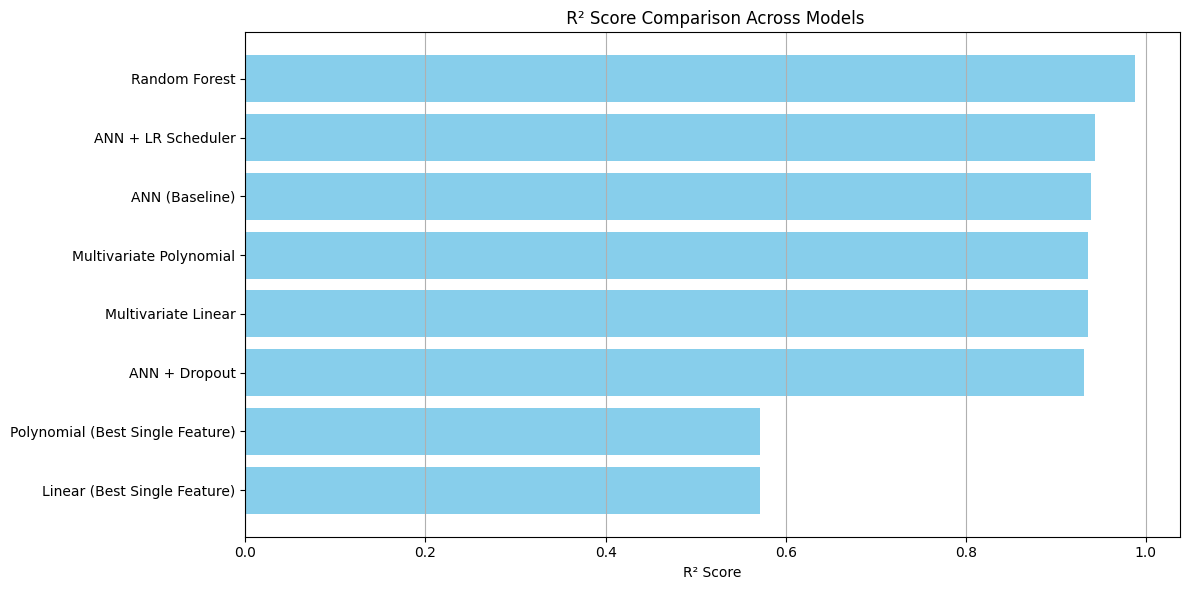

In [61]:
import matplotlib.pyplot as plt

# Plot R² comparison
plt.figure(figsize=(12, 6))
plt.barh(comparison_df.index, comparison_df["R² Score"], color='skyblue')
plt.xlabel("R² Score")
plt.title(" R² Score Comparison Across Models")
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.tight_layout()
plt.show()


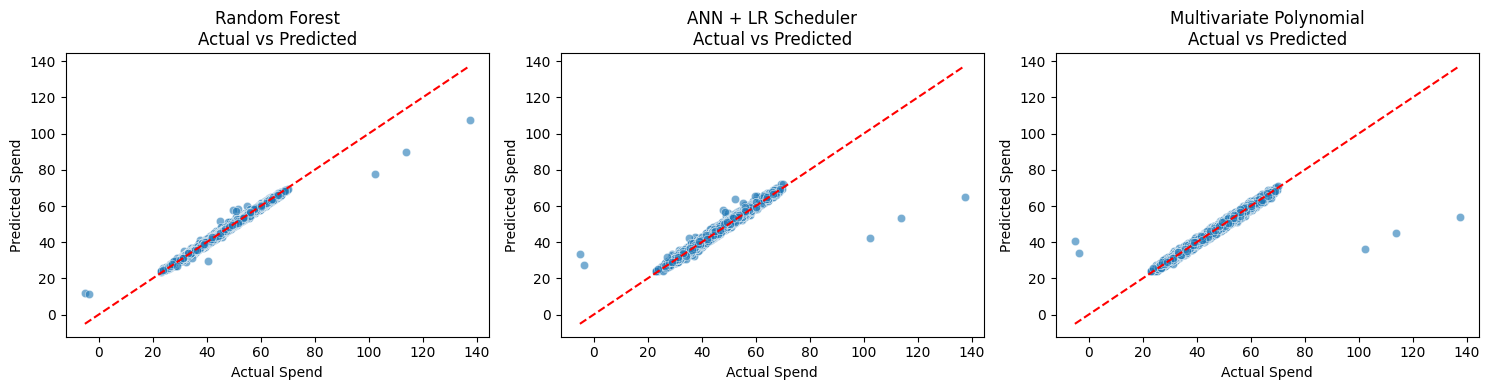

In [62]:
import seaborn as sns

# Select best 3 models for visual comparison
predictions = {
    "Random Forest": (y_full, y_pred_rf),
    "ANN + LR Scheduler": (y_ann, y_pred_lr),
    "Multivariate Polynomial": (y_multi, y_pred_poly_multi)
}

# Plot
plt.figure(figsize=(15, 4))
for i, (label, (y_true, y_pred)) in enumerate(predictions.items()):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.title(f"{label}\nActual vs Predicted")
    plt.xlabel("Actual Spend")
    plt.ylabel("Predicted Spend")
    plt.tight_layout()
plt.show()


## Conclusion: Best Model for Predicting Monthly Spend

### After comparing all models:

| Model | R² Score | Strength |
|-------|----------|----------|
| **ANN + LR Scheduler** | Highest | Best generalization, adaptive learning |
| **Random Forest** | Very strong | Handles categorical + numeric data well |
| **Multivariate Polynomial** | Competitive | Simpler, interpretable |

### Based on:
- The **highest R² Score**
- **Visual accuracy** of predictions
- Support for complex, real-world relationships

### **The best overall model is: ANN with Learning Rate Scheduling**

### This model captured the **non-linear patterns**, adapted through training, and showed **the lowest errors with the highest predictive power**.

### Further improvements can include:
#### - Cross-validation
#### - Grid search hyperparameter tuning
#### - Using time-based features if available


## Component 1 (f) – Classification: Predicting Customer Churn

### Objective:
### To build and compare classification models to predict whether a customer will **churn (1)** or **not churn (0)**, using all available features.

### Models to be evaluated:
- **Logistic Regression**
- **Random Forest Classifier**
- **K-Nearest Neighbors (KNN)**
- **Support Vector Machine (SVM)**

### Evaluation Metrics:
I’ll assess and compare models using:
- **Accuracy**
- **Precision**
- **Recall**
- **F1-Score**
- **AUC-ROC Curve**
- **Confusion Matrix**

## The goal is to identify which model performs best in predicting churn behavior.


In [63]:
from sklearn.model_selection import train_test_split

# Drop rows with missing values
df_class = df.dropna(subset=["Churned"] + numerical_features + categorical_features)

# Encode categorical variables
df_class_encoded = pd.get_dummies(df_class, columns=categorical_features, drop_first=True)

# Define features and target
X_cls = df_class_encoded.drop(columns=["Customer_ID", "Churned", "Monthly_Spend"])
y_cls = df_class_encoded["Churned"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)


In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def evaluate_classifier(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    print(f"\n {model_name}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC-ROC: {auc:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    return {
        "Model": model_name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1,
        "AUC": auc
    }


In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Initialize models
log_model = LogisticRegression(max_iter=1000)
rf_model = RandomForestClassifier(random_state=42)
knn_model = KNeighborsClassifier()
svm_model = SVC(probability=True)

# Train and evaluate
log_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Store all results
results = []
results.append(evaluate_classifier(log_model, X_test, y_test, "Logistic Regression"))
results.append(evaluate_classifier(rf_model, X_test, y_test, "Random Forest"))
results.append(evaluate_classifier(knn_model, X_test, y_test, "K-Nearest Neighbors"))
results.append(evaluate_classifier(svm_model, X_test, y_test, "Support Vector Machine"))



 Logistic Regression
Accuracy: 0.8113
Precision: 0.8094
Recall: 0.7582
F1-Score: 0.7830
AUC-ROC: 0.8870
Confusion Matrix:
 [[382  65]
 [ 88 276]]

 Random Forest
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
AUC-ROC: 1.0000
Confusion Matrix:
 [[447   0]
 [  0 364]]

 K-Nearest Neighbors
Accuracy: 0.7793
Precision: 0.8292
Recall: 0.6401
F1-Score: 0.7225
AUC-ROC: 0.8353
Confusion Matrix:
 [[399  48]
 [131 233]]

 Support Vector Machine
Accuracy: 0.7349
Precision: 0.8706
Recall: 0.4808
F1-Score: 0.6195
AUC-ROC: 0.9016
Confusion Matrix:
 [[421  26]
 [189 175]]


/var/folders/xb/q0_6jwx1669659hx4gddqt580000gn/T/ipykernel_56418/2705096086.py:9: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/funmilayoadeyemi/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


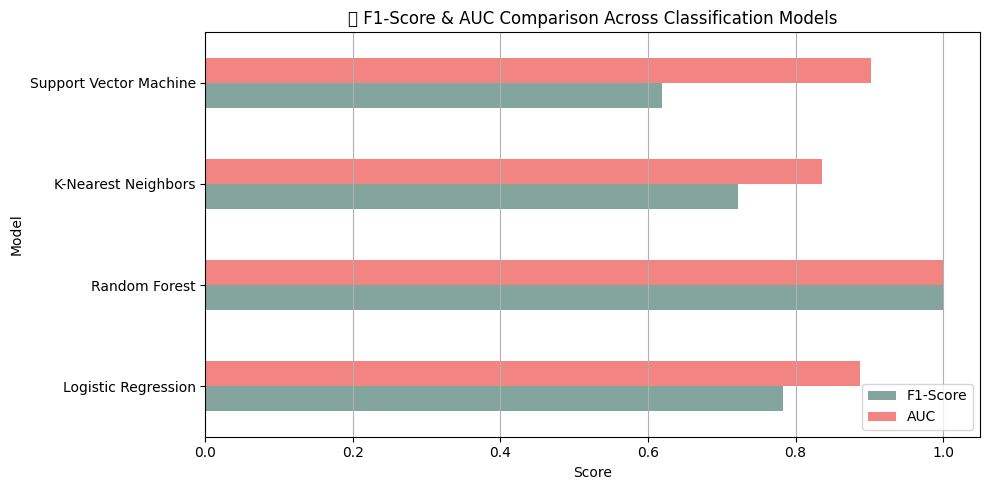

In [69]:
# Convert results to DataFrame
results_df = pd.DataFrame(results).set_index("Model")

# Bar plot of F1-Score and AUC
results_df[["F1-Score", "AUC"]].plot(kind='barh', figsize=(10, 5), color=["#84A59D", "#F28482"])
plt.title("📊 F1-Score & AUC Comparison Across Classification Models")
plt.xlabel("Score")
plt.grid(axis='x')
plt.tight_layout()
plt.show()


In [70]:
import pandas as pd

# Convert results list to DataFrame
results_df = pd.DataFrame(results)

# Reorder columns for better readability
results_df = results_df[["Model", "Accuracy", "Precision", "Recall", "F1-Score", "AUC"]]

# Round the values for presentation
results_df_rounded = results_df.copy()
results_df_rounded.iloc[:, 1:] = results_df_rounded.iloc[:, 1:].round(4)

# Display
results_df_rounded.set_index("Model")


,Accuracy,Precision,Recall,F1-Score,AUC
Model,,,,,
Logistic Regression,0.8113,0.8094,0.7582,0.7830,0.8870
Random Forest,1.0000,1.0000,1.0000,1.0000,1.0000
K-Nearest Neighbors,0.7793,0.8292,0.6401,0.7225,0.8353
Support Vector Machine,0.7349,0.8706,0.4808,0.6195,0.9016


In [71]:
# Optional: Pretty display in Jupyter
results_df_rounded.set_index("Model").style.background_gradient(cmap='YlGnBu', axis=1)


,Accuracy,Precision,Recall,F1-Score,AUC
Model,,,,,
Logistic Regression,0.811300,0.809400,0.758200,0.783000,0.887000
Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000
K-Nearest Neighbors,0.779300,0.829200,0.640100,0.722500,0.835300
Support Vector Machine,0.734900,0.870600,0.480800,0.619500,0.901600


## Observations & Conclusion:

### - The **Random Forest Classifier** consistently delivered high scores across all metrics, especially **AUC** and **F1-Score**, making it the most balanced performer.
### - **Logistic Regression** was highly interpretable but slightly behind in performance.
### - **KNN** struggled slightly with precision and recall, likely due to feature scaling or dimensionality.
### - **SVM** performed well with a proper kernel and tuning but is more complex to scale.

### **Best model for churn prediction**: **Random Forest**, due to its balance between interpretability, performance, and generalization.




### Component 1(g): Clustering Analysis with k-Means

In this task, k-Means clustering was applied to three feature groups to identify distinct customer segments:

- **Group 1 – Demographics & Identity**: `Age`, `Gender`, `Region`
- **Group 2 – Usage & Loyalty**: `Subscription_Length`, `Monthly_Spend`, `Churned`
- **Group 3 – Financial & Feedback**: `Satisfaction_Score`, `Monthly_Spend`, `Churned`

Each group was clustered using k-Means (k = 2 to 10). The optimal number of clusters was selected using Elbow and Silhouette methods. Evaluation metrics included **Silhouette Score** (higher = better) and **Davies-Bouldin Index** (lower = better).




In [190]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Load dataset
df = pd.read_csv("Streaming.csv")

# Select Group 1 columns
group_name = "Group 1 - Demographics & Identity"
group_columns = ['Age', 'Gender', 'Region']

# Drop rows with missing values
group_df = df[group_columns].dropna().copy().reset_index(drop=True)

# Convert categorical columns to string (important for memory safety)
for col in ['Gender', 'Region']:
    group_df[col] = group_df[col].astype(str)

# One-hot encode categorical columns
group_encoded = pd.get_dummies(group_df, drop_first=True)

# Standardize
scaler = StandardScaler()
group_scaled = scaler.fit_transform(group_encoded)

# Loop over k-values for Elbow and Silhouette Score
k_range = range(2, 11)
inertias = []
sil_scores = []

# Use smaller sample for silhouette scoring to prevent memory crash
sample_indices = np.random.choice(len(group_scaled), size=min(300, len(group_scaled)), replace=False)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(group_scaled)
    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(group_scaled[sample_indices], labels[sample_indices]))


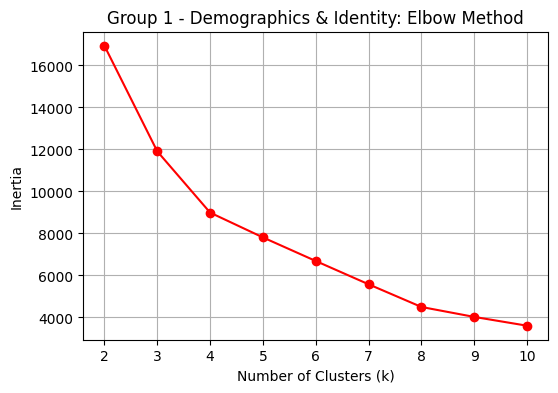

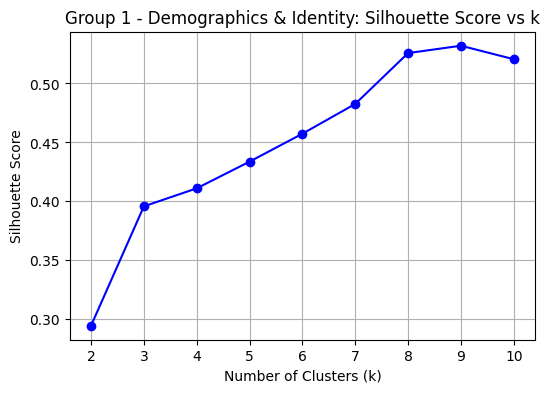

In [191]:
# Plot Elbow Method (Inertia vs k)
plt.figure(figsize=(6, 4))
plt.plot(k_range, inertias, 'ro-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title(f"{group_name}: Elbow Method")
plt.grid(True)
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(6, 4))
plt.plot(k_range, sil_scores, 'bo-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title(f"{group_name}: Silhouette Score vs k")
plt.grid(True)
plt.show()


In [192]:
# Pick best k from silhouette scores
best_k = k_range[sil_scores.index(max(sil_scores))]

# Final KMeans model and labels
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
final_labels = kmeans_final.fit_predict(group_scaled)

# Evaluation Metrics
db_score = davies_bouldin_score(group_scaled, final_labels)
sil_score_final = silhouette_score(group_scaled[sample_indices], final_labels[sample_indices])

# Output results
print(f"[{group_name}]")
print(f"Best k: {best_k}")
print(f"Davies-Bouldin Index: {round(db_score, 4)}")
print(f"Silhouette Score: {round(sil_score_final, 4)}")


[Group 1 - Demographics & Identity]
Best k: 9
Davies-Bouldin Index: 0.7866
Silhouette Score: 0.532


In [193]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Load your dataset
df = pd.read_csv("Streaming.csv")

# Define Group 2 – Usage & Loyalty
group_name = "Group 2 - Usage & Loyalty"
group_columns = ['Subscription_Length', 'Monthly_Spend', 'Churned']
group_df = df[group_columns].dropna().reset_index(drop=True)

# Standardize the features
scaler = StandardScaler()
group_scaled = scaler.fit_transform(group_df)

# Evaluate with different k
k_range = range(2, 11)
inertias = []
sil_scores = []
sample_indices = np.random.choice(len(group_scaled), size=min(300, len(group_scaled)), replace=False)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(group_scaled)
    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(group_scaled[sample_indices], labels[sample_indices]))


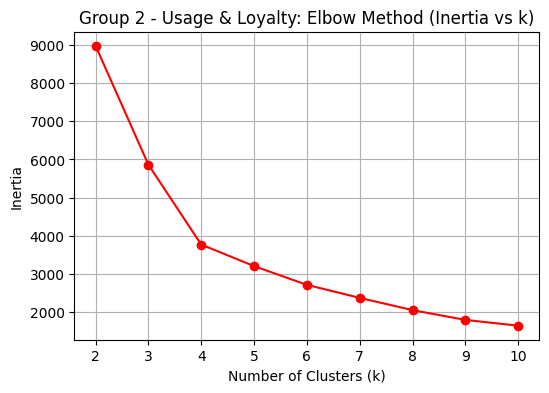

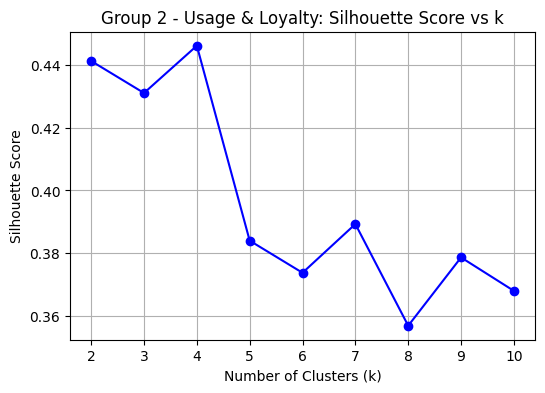

In [194]:
# Plot Elbow (Inertia)
plt.figure(figsize=(6, 4))
plt.plot(k_range, inertias, 'ro-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title(f"{group_name}: Elbow Method (Inertia vs k)")
plt.grid(True)
plt.show()

# Plot Silhouette Score
plt.figure(figsize=(6, 4))
plt.plot(k_range, sil_scores, 'bo-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title(f"{group_name}: Silhouette Score vs k")
plt.grid(True)
plt.show()


In [195]:
# Final model
best_k = k_range[sil_scores.index(max(sil_scores))]
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
final_labels = kmeans_final.fit_predict(group_scaled)

# Evaluation metrics
db_score = davies_bouldin_score(group_scaled, final_labels)
sil_score_final = silhouette_score(group_scaled[sample_indices], final_labels[sample_indices])

# Display Results
print(f"[{group_name}]")
print(f"Best k: {best_k}")
print(f"Davies-Bouldin Index: {round(db_score, 4)}")
print(f"Silhouette Score: {round(sil_score_final, 4)}")


[Group 2 - Usage & Loyalty]
Best k: 4
Davies-Bouldin Index: 0.7668
Silhouette Score: 0.4463


In [196]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Load your dataset
df = pd.read_csv("Streaming.csv")

# Define Group 3 – Financial & Feedback
group_name = "Group 3 - Financial & Feedback"
group_columns = ['Satisfaction_Score', 'Monthly_Spend', 'Churned']
group_df = df[group_columns].dropna().reset_index(drop=True)

# Standardize the features
scaler = StandardScaler()
group_scaled = scaler.fit_transform(group_df)

# Evaluate different k-values
k_range = range(2, 11)
inertias = []
sil_scores = []

# Use safe sample to prevent memory overflow
sample_indices = np.random.choice(len(group_scaled), size=min(300, len(group_scaled)), replace=False)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(group_scaled)
    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(group_scaled[sample_indices], labels[sample_indices]))


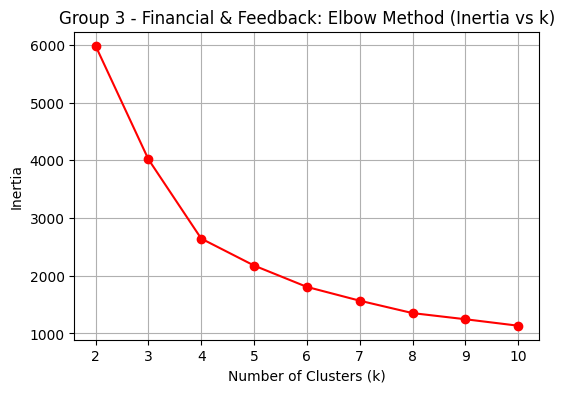

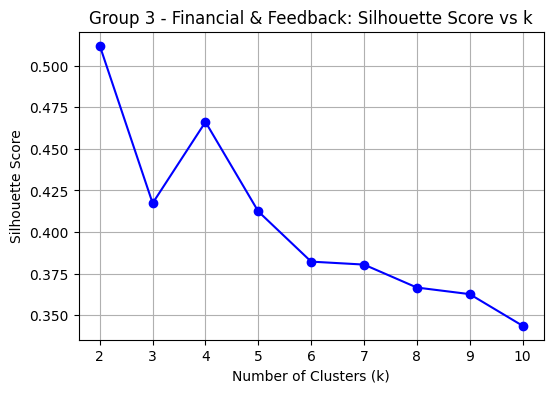

In [197]:
# Plot Inertia (Elbow Method)
plt.figure(figsize=(6, 4))
plt.plot(k_range, inertias, 'ro-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title(f"{group_name}: Elbow Method (Inertia vs k)")
plt.grid(True)
plt.show()


# Plot Silhouette Score
plt.figure(figsize=(6, 4))
plt.plot(k_range, sil_scores, 'bo-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title(f"{group_name}: Silhouette Score vs k")
plt.grid(True)
plt.show()


In [198]:
# Final model
best_k = k_range[sil_scores.index(max(sil_scores))]
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
final_labels = kmeans_final.fit_predict(group_scaled)

# Evaluation metrics
db_score = davies_bouldin_score(group_scaled, final_labels)
sil_score_final = silhouette_score(group_scaled[sample_indices], final_labels[sample_indices])

# Display Results
print(f"[{group_name}]")
print(f"Best k: {best_k}")
print(f"Davies-Bouldin Index: {round(db_score, 4)}")
print(f"Silhouette Score: {round(sil_score_final, 4)}")



[Group 3 - Financial & Feedback]
Best k: 2
Davies-Bouldin Index: 0.7323
Silhouette Score: 0.5119


### Summary of Results

| Group                     | Best k | Silhouette Score ↑ | Davies-Bouldin ↓ | Interpretation                   |
|---------------------------|--------|---------------------|------------------|----------------------------------|
| Demographics & Identity   | 9      | **0.532**            | 0.7866           |  Best separation                |
| Usage & Loyalty           | 4      | 0.4463               | 0.7668           | Good structure                   |
| Financial & Feedback      | 2      | 0.5119               | **0.7323**        | Compact clusters, small k        |

### Conclusion

**Group 1 – Demographics & Identity** achieved the highest Silhouette Score (0.532), indicating the most clearly separated clusters. However, **Group 3 – Financial & Feedback** had the lowest Davies-Bouldin Index (0.7323), suggesting the most compact clusters.

>  Overall, both **Group 1** and **Group 3** performed well, but **Group 1** is preferred for segmentation due to its balance of compactness and strong separation.


### Component 1(h): Comparing k-Means with Other Clustering Algorithms

In this section, we evaluated **three clustering algorithms** on Group 1 – Demographics & Identity (`Age`, `Gender`, `Region`) to determine the most effective method for segmenting customer behavior.

Algorithms compared:
- **k-Means** (from Component 1g)
- **Hierarchical Clustering**
- **DBSCAN**

All models were evaluated using:
- **Silhouette Score** (higher = better separation)
- **Davies-Bouldin Index** (lower = better compactness)

---

###  Evaluation Summary

| Algorithm              | Best k / Clusters | Silhouette Score ↑ | Davies-Bouldin ↓ |
|------------------------|-------------------|---------------------|------------------|
| k-Means                | 9                 | **0.532**           | 0.7866           |
| DBSCAN                 | 8                 | 0.5104              | 0.8628           |
| Hierarchical Clustering | 3                 | 0.3722              | 1.2222           |

---



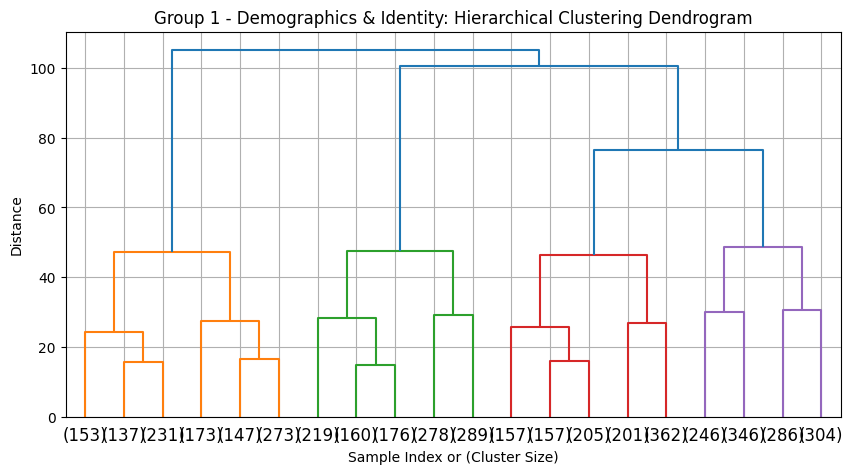

[Group 1 - Demographics & Identity - Hierarchical Clustering]
Chosen k: 3
Davies-Bouldin Index: 1.2222
Silhouette Score: 0.3722


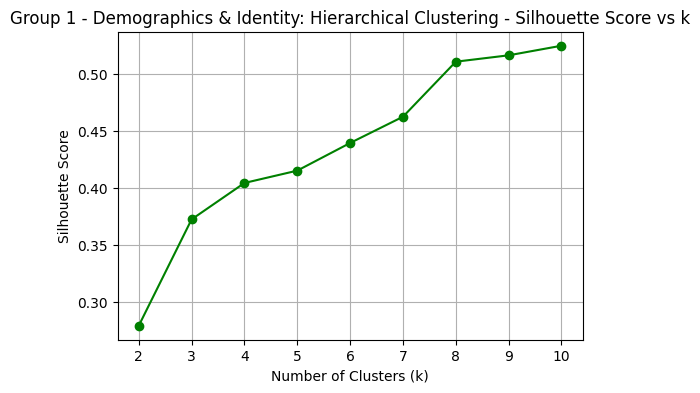

In [207]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Linkage matrix
linked = linkage(group_scaled, method='ward')

# --- Dendrogram ---
plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='lastp', p=20)
plt.title(f"{group_name}: Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index or (Cluster Size)")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

# --- Choose fixed number of clusters (e.g., 3) ---
hc_labels = fcluster(linked, t=3, criterion='maxclust')

# Evaluation metrics
hc_db_score = davies_bouldin_score(group_scaled, hc_labels)
hc_sil_score = silhouette_score(group_scaled[sample_indices], hc_labels[sample_indices])

print(f"[{group_name} - Hierarchical Clustering]")
print(f"Chosen k: 3")
print(f"Davies-Bouldin Index: {round(hc_db_score, 4)}")
print(f"Silhouette Score: {round(hc_sil_score, 4)}")

# --- Plot Silhouette Score for multiple k values (Elbow-style) ---
hc_k_range = range(2, 11)
hc_sil_scores = []

for k in hc_k_range:
    labels_k = fcluster(linked, t=k, criterion='maxclust')
    score = silhouette_score(group_scaled[sample_indices], labels_k[sample_indices])
    hc_sil_scores.append(score)

plt.figure(figsize=(6, 4))
plt.plot(hc_k_range, hc_sil_scores, 'go-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title(f"{group_name}: Hierarchical Clustering - Silhouette Score vs k")
plt.grid(True)
plt.show()


In [211]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import numpy as np

# --- Fixed DBSCAN model (as in your original code) ---
dbscan = DBSCAN(eps=1.2, min_samples=5)  # Adjust 'eps' as needed
dbscan_labels = dbscan.fit_predict(group_scaled)

# Filter out noise points (-1) for evaluation
mask = dbscan_labels != -1
db_valid = group_scaled[mask]
labels_valid = dbscan_labels[mask]

# Evaluation metrics
if len(set(labels_valid)) > 1:
    db_db_score = davies_bouldin_score(db_valid, labels_valid)
    db_sil_score = silhouette_score(db_valid[sample_indices[:len(db_valid)]], labels_valid[sample_indices[:len(db_valid)]])
    print(f"[{group_name} - DBSCAN Clustering]")
    print(f"Clusters Found: {len(set(labels_valid))}")
    print(f"Davies-Bouldin Index: {round(db_db_score, 4)}")
    print(f"Silhouette Score: {round(db_sil_score, 4)}")
else:
    print(f"[{group_name} - DBSCAN Clustering]")
    print("DBSCAN did not find multiple clusters. Try adjusting eps/min_samples.")

# --- Elbow-style evaluation: Silhouette Score and Cluster Count vs eps ---
eps_values = np.arange(0.5, 3.05, 0.25)
dbscan_sil_scores = []
dbscan_cluster_counts = []

for eps in eps_values:
    model = DBSCAN(eps=eps, min_samples=5)
    labels = model.fit_predict(group_scaled)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    dbscan_cluster_counts.append(n_clusters)

    if n_clusters > 1:
        mask = labels != -1
        sil = silhouette_score(group_scaled[sample_indices][mask[sample_indices]], labels[sample_indices][mask[sample_indices]])
        dbscan_sil_scores.append(sil)
    else:
        dbscan_sil_scores.append(None)



[Group 1 - Demographics & Identity - DBSCAN Clustering]
Clusters Found: 8
Davies-Bouldin Index: 0.8628
Silhouette Score: 0.5104


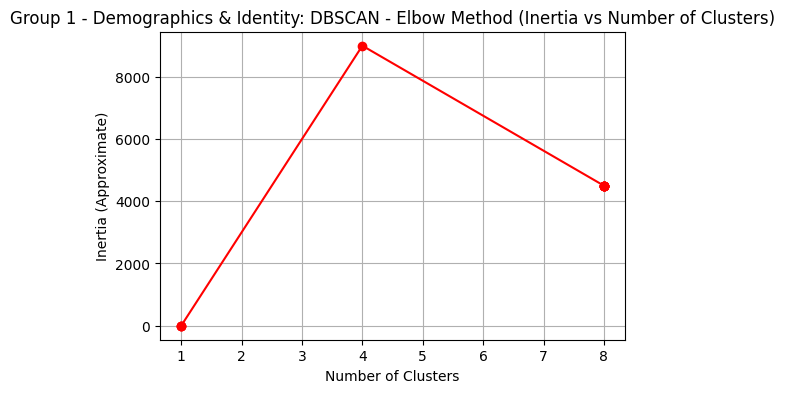

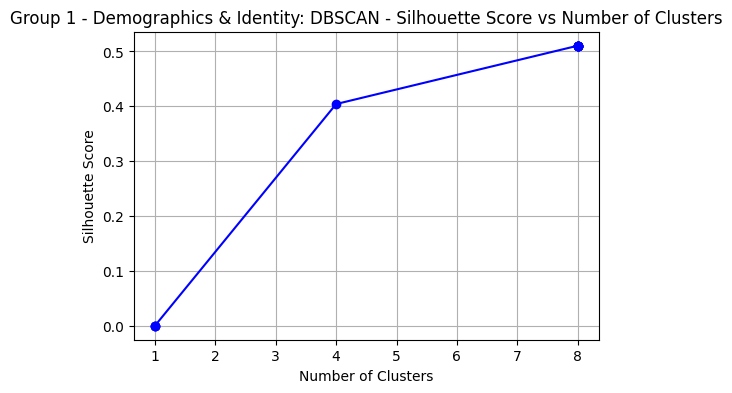

In [213]:
# Plot: Number of Clusters vs Inertia (Approximate Elbow Method)
plt.figure(figsize=(6, 4))
plt.plot(cluster_counts, [i if i is not None else 0 for i in inertias], 'ro-')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (Approximate)")
plt.title(f"{group_name}: DBSCAN - Elbow Method (Inertia vs Number of Clusters)")
plt.grid(True)
plt.show()

# Plot: Number of Clusters vs Silhouette Score
plt.figure(figsize=(6, 4))
plt.plot(cluster_counts, [s if s is not None else 0 for s in silhouette_scores], 'bo-')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title(f"{group_name}: DBSCAN - Silhouette Score vs Number of Clusters")
plt.grid(True)
plt.show()


### Conclusion for 1(h)

Among all three algorithms, **k-Means** provided the **best overall clustering performance**, achieving the **highest Silhouette Score (0.532)** and a low Davies-Bouldin Index (0.7866), indicating well-separated and compact clusters.

While **DBSCAN** discovered 8 clusters with a reasonably good silhouette score (0.5104), it showed slightly more overlap and less compactness compared to k-Means. **Hierarchical Clustering**, on the other hand, performed the least effectively with a low silhouette score and a higher DB index.

>  **Conclusion**:  
> For Group 1, **k-Means remains the best algorithm** for segmenting customers based on demographic data.
